In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

#### Load the alignment distance matrix

In [3]:
alignment_matrix = pd.read_csv("../data/dataframes/alignment_matrix.csv")
alignment_matrix.set_index("target", inplace=True)
alignment_matrix

,1b77A_1_228,1czdA_1001_1228,1dmlA_29_319,1iz4A_2_244,1mmiB_1_363,1plqA_1_250,1rxmA_1_238,1ud9A_1_240,1vpkA_1_361,2avtA_1_377,...,6dj8A_0_385,6dlkA_0_379,6manA_0_379,6qh1A_1_253,6t8hE_2_247,7bupA_1_255,7ep8A_1_256,7evpA_3_371,7o1eA_2_251,7rzmA_2_361
target,,,,,,,,,,,,,,,,,,,,,
1b77A_1_228,0.0000,0.0104,0.3844,0.3211,0.3048,0.3142,0.3119,0.3440,0.2793,0.3298,...,0.2871,0.3038,0.3009,0.2963,0.2907,0.3027,0.3114,0.3011,0.3422,0.2959
1czdA_1001_1228,0.0104,0.0000,0.3844,0.3162,0.3030,0.3117,0.3079,0.3404,0.2848,0.3274,...,0.2894,0.3052,0.3050,0.2898,0.2873,0.2969,0.3038,0.3066,0.3343,0.2997
1dmlA_29_319,0.3844,0.3844,0.0000,0.3696,0.3397,0.3295,0.3376,0.3677,0.3695,0.3399,...,0.3462,0.3496,0.3501,0.3175,0.3272,0.3317,0.3212,0.3420,0.3378,0.3530
1iz4A_2_244,0.3211,0.3162,0.3696,0.0000,0.2747,0.1381,0.1122,0.0808,0.2535,0.3332,...,0.3265,0.3056,0.2738,0.1068,0.0543,0.0999,0.1246,0.2935,0.1153,0.3071
1mmiB_1_363,0.3048,0.3030,0.3397,0.2747,0.0000,0.2397,0.2358,0.2974,0.1104,0.1065,...,0.1392,0.0831,0.0799,0.2442,0.2436,0.2472,0.2618,0.0859,0.2747,0.0634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7bupA_1_255,0.3027,0.2969,0.3317,0.0999,0.2472,0.0769,0.1381,0.1297,0.2228,0.2972,...,0.2954,0.2738,0.2510,0.0463,0.0847,0.0000,0.0556,0.2643,0.0608,0.2931
7ep8A_1_256,0.3114,0.3038,0.3212,0.1246,0.2618,0.0646,0.1485,0.1341,0.2445,0.3046,...,0.3084,0.2846,0.2634,0.0495,0.0930,0.0556,0.0000,0.2774,0.0395,0.3086
7evpA_3_371,0.3011,0.3066,0.3420,0.2935,0.0859,0.2448,0.2494,0.3023,0.1319,0.0681,...,0.1411,0.0966,0.0961,0.2570,0.2631,0.2643,0.2774,0.0000,0.2902,0.0877


#### You can add additional data to color the visualization based on
#### In this case, the number of units

In [4]:
rdb_unique_df = pd.read_csv("../data/dataframes/reviewed_unique_regions.csv")
rdb_unique_df.set_index("region_id", inplace=True)

In [5]:
box_df = rdb_unique_df[rdb_unique_df["CTFC"].apply(lambda x: ".".join(x.split(".")[:2]) == "3.6")]

In [30]:
color_labels = [str(box_df.loc[region_id, "Units_num"]) for region_id in alignment_matrix.index]
unique_color_labels = sorted(box_df["Units_num"].unique().tolist())

#### Cluster with the DBSCAN and visualize the results

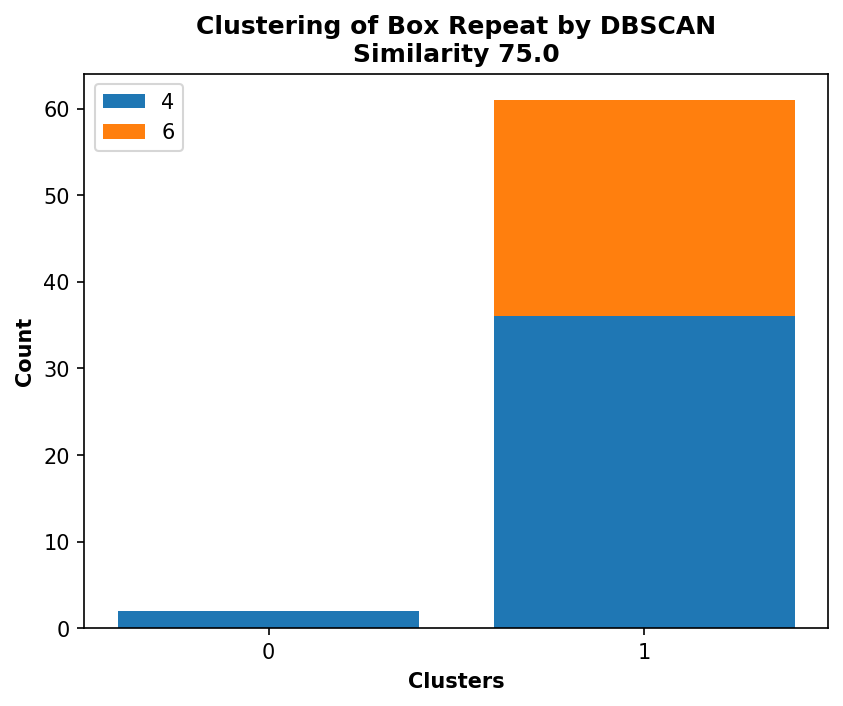

In [40]:
dis_score = 0.25
core_size = 2

clustering = DBSCAN(eps=dis_score, metric="precomputed", min_samples=core_size).fit(alignment_matrix)
labels = clustering.labels_

#############################################################################################################################################################

regions_labels = list(zip(alignment_matrix.index, labels))
regions_labels.sort(key=lambda x: x[1])
sorted_regions = [i[0] for i in regions_labels]
sorted_cluster_labels = [i[1] for i in regions_labels]
sorted_color_labels = box_df.loc[sorted_regions]["Units_num"].tolist()

dbscan_df = pd.DataFrame({"region_id": sorted_regions, "group": sorted_cluster_labels, "units_num": sorted_color_labels})

#############################################################################################################################################################

sorted_unique_labels = []
for i in sorted_cluster_labels:
    if i not in sorted_unique_labels:
        sorted_unique_labels.append(i)

# sorted_unique_labels
color_cluster_dict = {}
for color_label in unique_color_labels:
    group = dbscan_df[dbscan_df["units_num"] == color_label].groupby("group").count()["units_num"].index.tolist()
    count = dbscan_df[dbscan_df["units_num"] == color_label].groupby("group").count()["units_num"].tolist()
    color_cluster_dict[color_label] = {k: v for k, v in zip(group, count)}

#############################################################################################################################################################

fig = plt.figure(dpi=150)
ax = fig.add_subplot()

total_counts = [0 for i in range(len(sorted_unique_labels))]
for color_label in unique_color_labels:
    y = [color_cluster_dict[color_label][group] if group in color_cluster_dict[color_label].keys() else 0 for group in sorted_unique_labels]
    ax.bar(x=sorted_unique_labels, height=y, bottom=total_counts)
    total_counts = [a+b for a, b in zip(total_counts, y)]

ax.legend(unique_color_labels)
ax.set_xticks(sorted_unique_labels)
ax.set_xticklabels(sorted_unique_labels)
ax.set_xlabel("Clusters", fontweight="bold")
ax.set_ylabel("Count", fontweight="bold")

sim = round((1 - dis_score) * 100, 2)
ax.set_title(f"Clustering of Box Repeat by DBSCAN\nSimilarity {sim}", fontweight="bold")


plt.show()